## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 120)

## Reading & Analyzing CSV Files

In [2]:
# Load files
equip = pd.read_csv('./files/Equip.csv')
weather = pd.read_csv('./files/weather.csv')

In [3]:
equip.shape, weather.shape

((6202, 7), (6202, 5))

In [4]:
equip.columns, weather.columns

(Index(['ts', 'Valve', 'Occp', 'RaHumidity', 'RaTemp', 'SaTemp', 'ThermEnergy'], dtype='object'),
 Index(['ts', 'main.temp', 'main.humidity', 'wind.speed', 'clouds.all'], dtype='object'))

In [5]:
equip.dtypes

ts              object
Valve          float64
Occp             int64
RaHumidity     float64
RaTemp         float64
SaTemp         float64
ThermEnergy    float64
dtype: object

In [6]:
weather.dtypes

ts                object
main.temp        float64
main.humidity    float64
wind.speed       float64
clouds.all       float64
dtype: object

In [7]:
equip.head(2)

,ts,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy
0,7/7/2024 0:00,100.0,1,75.34340,18.400000,16.000000,12.115658
1,7/7/2024 0:05,100.0,1,75.51844,19.300001,15.900001,12.118668


In [8]:
weather.head(2)

,ts,main.temp,main.humidity,wind.speed,clouds.all
0,7/7/2024 0:00,33.9,53.44,4.9,18.0
1,7/7/2024 0:05,33.9,53.44,4.9,18.0


In [9]:
#replaced '.' with '_' in columns
weather.columns = weather.columns.str.replace('.', '_', regex=False)

In [10]:
equip.Occp.unique()

array([1, 0])

In [11]:
equip.describe()

,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy
count,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000
mean,54.506010,0.831990,73.011266,21.017349,18.441551,6.671572
std,33.585557,0.373906,7.260645,1.239014,2.236872,4.091548
min,0.000000,0.000000,45.261050,17.800001,14.600000,0.000000
25%,36.535156,1.000000,71.592480,20.100000,16.700000,4.533545
50%,56.179688,1.000000,74.946420,21.000000,18.100000,6.891530
75%,80.730469,1.000000,77.181340,21.900000,19.500000,9.942824
max,100.000000,1.000000,85.702170,24.500000,25.100000,12.229250


In [12]:
weather.describe()

,main_temp,main_humidity,wind_speed,clouds_all
count,6202.000000,6202.000000,6202.000000,6202.000000
mean,25.239423,60.290598,5.812883,21.481441
std,7.775250,18.358458,3.912860,31.857705
min,5.900000,15.450000,0.000000,0.000000
25%,19.800000,46.000000,2.700000,0.000000
50%,24.600000,57.000000,5.100000,3.000000
75%,30.000000,74.000000,8.300000,28.000000
max,46.200000,100.000000,22.000000,100.000000


In [13]:
# Convert to datetime
equip['ts'] = pd.to_datetime(equip['ts'], errors='coerce')
weather['ts'] = pd.to_datetime(weather['ts'], errors='coerce')

In [14]:
weather.tail(2)

,ts,main_temp,main_humidity,wind_speed,clouds_all
6200,2025-03-03 23:50:00,18.6,52.0,4.0,0.0
6201,2025-03-03 23:55:00,19.9,48.0,4.0,0.0


In [15]:
#checking na values in both dataframes
print(equip.isna().sum().sort_values(ascending=False))

ts             0
Valve          0
Occp           0
RaHumidity     0
RaTemp         0
SaTemp         0
ThermEnergy    0
dtype: int64


In [16]:
print(weather.isna().sum().sort_values(ascending=False))

ts               0
main_temp        0
main_humidity    0
wind_speed       0
clouds_all       0
dtype: int64


In [17]:
# Drop exact duplicate rows if any
equip_duplicates = equip.duplicated().sum()
weather_duplicates = weather.duplicated().sum()

In [18]:
print(f"\nDuplicate rows -> Equip: {equip_duplicates}, Weather: {weather_duplicates}")


Duplicate rows -> Equip: 0, Weather: 0


In [19]:
#Checking date time nan values
equip[equip['ts'].isna()].shape[0], weather[weather['ts'].isna()].shape[0]

(0, 0)

In [20]:
# Report frequency guess for main dataset
if len(equip) > 1:
    diffs = equip['ts'].diff().dropna().dt.total_seconds().median()
    print(f"\nEquip median sampling interval ≈ {diffs} seconds (~{diffs/60:.1f} minutes)")


Equip median sampling interval ≈ 300.0 seconds (~5.0 minutes)


In [21]:
#sorting data on the basis of 'ts' column
weather_sorted = weather.sort_values(by='ts').reset_index(drop=True)
equip_sorted = equip.sort_values(by='ts').reset_index(drop=True)

In [22]:
weather_sorted.iloc[[50]]

,ts,main_temp,main_humidity,wind_speed,clouds_all
50,2024-07-07 04:15:00,32.6,54.29,3.4,30.0


In [23]:
equip_sorted.iloc[[50]]

,ts,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy
50,2024-07-07 04:15:00,0.0,0,75.04645,20.9,17.2,0.0


In [24]:
#verifying if all date values are present in both datafrmaes (cross verification for merging dfs)
equip_ts = set(equip_sorted['ts'])
weather_ts = set(weather_sorted['ts'])

ts_in_equip_not_in_weather = list(equip_ts - weather_ts)
ts_in_weather_not_in_equip = list(weather_ts - equip_ts)

In [25]:
len(ts_in_equip_not_in_weather), len(ts_in_weather_not_in_equip)

(0, 0)

In [26]:
#Merging both dataframes on the basis of 'ts' as ts(datetime) is same in both dfs
weather_equip = pd.merge(equip_sorted, weather_sorted, on='ts', how='inner')

In [27]:
weather_equip.shape

(6202, 11)

In [28]:
print(weather_equip.isna().sum().sort_values(ascending=False))

ts               0
Valve            0
Occp             0
RaHumidity       0
RaTemp           0
SaTemp           0
ThermEnergy      0
main_temp        0
main_humidity    0
wind_speed       0
clouds_all       0
dtype: int64


In [29]:
#dropping null values on the basis of 'ts'
weather_equip = weather_equip.dropna(subset=['ts']).drop_duplicates().sort_values('ts').reset_index(drop=True)

In [30]:
weather_equip.shape

(6202, 11)

In [31]:
# updating datatypes of numeric columns
numeric_cols = [
    'Valve', 'Occp', 'RaHumidity', 'RaTemp', 'SaTemp',
    'ThermEnergy', 'main_temp', 'main_humidity', 'wind_speed', 'clouds_all'
]

for col in numeric_cols:
    weather_equip[col] = pd.to_numeric(weather_equip[col], errors='coerce')

In [33]:
weather_equip.head()

,ts,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy,main_temp,main_humidity,wind_speed,clouds_all
0,2024-07-07 00:00:00,100.0,1,75.34340,18.400000,16.000000,12.115658,33.9,53.44,4.9,18.0
1,2024-07-07 00:05:00,100.0,1,75.51844,19.300001,15.900001,12.118668,33.9,53.44,4.9,18.0
2,2024-07-07 00:10:00,0.0,0,75.36840,17.800001,15.000000,0.000000,33.9,53.44,4.9,18.0
3,2024-07-07 00:15:00,0.0,0,78.45040,18.600000,17.000000,0.000000,33.9,53.44,4.9,18.0
4,2024-07-07 00:20:00,0.0,0,76.46242,19.000000,17.000000,0.000000,33.9,53.44,4.9,18.0


In [34]:
# Outliers Handling (updating values to be in their actual range e.g humidity cannot be -ve or more than 100%)

# Clean Occp to 0/1
weather_equip['Occp'] = weather_equip['Occp'].round().clip(0,1).fillna(0).astype(int)

weather_equip['RaHumidity']    = weather_equip['RaHumidity'].clip(0, 100)
weather_equip['main_humidity'] = weather_equip['main_humidity'].clip(0, 100)
weather_equip['RaTemp']        = weather_equip['RaTemp'].clip(-40, 60)
weather_equip['SaTemp']        = weather_equip['SaTemp'].clip(-40, 60)
weather_equip['main_temp']     = weather_equip['main_temp'].clip(-40, 60)
weather_equip['wind_speed']    = weather_equip['wind_speed'].clip(lower=0)

In [35]:
# Outlier winsorization (1st–99th percentile) (values that can increase but handling outlier as per average data)
num_cols = weather_equip.select_dtypes(include='number').columns.drop('Occp')
p1 = weather_equip[num_cols].quantile(0.01)
p99 = weather_equip[num_cols].quantile(0.99)
weather_equip[num_cols] = weather_equip[num_cols].clip(lower=p1, upper=p99, axis=1)

In [36]:
weather_equip.head()

,ts,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy,main_temp,main_humidity,wind_speed,clouds_all
0,2024-07-07 00:00:00,100.0,1,75.34340,18.500000,16.000000,12.115658,33.9,53.44,4.9,18.0
1,2024-07-07 00:05:00,100.0,1,75.51844,19.300001,15.900001,12.118668,33.9,53.44,4.9,18.0
2,2024-07-07 00:10:00,0.0,0,75.36840,18.500000,15.100000,0.000000,33.9,53.44,4.9,18.0
3,2024-07-07 00:15:00,0.0,0,78.45040,18.600000,17.000000,0.000000,33.9,53.44,4.9,18.0
4,2024-07-07 00:20:00,0.0,0,76.46242,19.000000,17.000000,0.000000,33.9,53.44,4.9,18.0


In [37]:
print("Shape after cleaning:", weather_equip.shape)
print("Numeric summary after capping:")
print(weather_equip[num_cols].describe().T[['min','mean','max']].round(2))

Shape after cleaning: (6202, 11)
Numeric summary after capping:
                 min   mean     max
Valve           0.00  54.51  100.00
RaHumidity     47.65  73.01   82.85
RaTemp         18.50  21.02   23.80
SaTemp         15.10  18.44   24.40
ThermEnergy     0.00   6.67   12.21
main_temp       7.90  25.24   42.50
main_humidity  21.32  60.31   97.00
wind_speed      0.50   5.79   15.70
clouds_all      0.00  21.48  100.00


## Feature Engineering 

In [38]:
# make a working copy
df_fe = weather_equip.copy()
df_fe['ts'] = pd.to_datetime(df_fe['ts'], errors='coerce')
df_fe = df_fe.dropna(subset=['ts']).sort_values('ts').reset_index(drop=True)
df_fe = df_fe.set_index('ts')

In [39]:
# fetching time features from datetime for model understanding
df_fe['hour'] = df_fe.index.hour
df_fe['minute'] = df_fe.index.minute
df_fe['dayofweek'] = df_fe.index.dayofweek
df_fe['month'] = df_fe.index.month
df_fe['is_weekend'] = (df_fe['dayofweek'] >= 5).astype(int)

In [40]:
df_fe.head()

,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy,main_temp,main_humidity,wind_speed,clouds_all,hour,minute,dayofweek,month,is_weekend
ts,,,,,,,,,,,,,,,
2024-07-07 00:00:00,100.0,1,75.34340,18.500000,16.000000,12.115658,33.9,53.44,4.9,18.0,0,0,6,7,1
2024-07-07 00:05:00,100.0,1,75.51844,19.300001,15.900001,12.118668,33.9,53.44,4.9,18.0,0,5,6,7,1
2024-07-07 00:10:00,0.0,0,75.36840,18.500000,15.100000,0.000000,33.9,53.44,4.9,18.0,0,10,6,7,1
2024-07-07 00:15:00,0.0,0,78.45040,18.600000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,15,6,7,1
2024-07-07 00:20:00,0.0,0,76.46242,19.000000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,20,6,7,1


In [41]:
# cyclic encoding for repeating signals (helps models learn periodicity e.g when time changes from 23:00 to 00:00 it looks like there is a difference of 23 but infact the difference is of 1 hour)
df_fe['hour_sin'] = np.sin(2 * np.pi * df_fe['hour'] / 24)
df_fe['hour_cos'] = np.cos(2 * np.pi * df_fe['hour'] / 24)
df_fe['minute_sin'] = np.sin(2 * np.pi * df_fe['minute'] / 60)
df_fe['minute_cos'] = np.cos(2 * np.pi * df_fe['minute'] / 60)

In [43]:
df_fe[['hour','dayofweek','is_weekend','hour_sin','hour_cos']].head()

,hour,dayofweek,is_weekend,hour_sin,hour_cos
ts,,,,,
2024-07-07 00:00:00,0,6,1,0.0,1.0
2024-07-07 00:05:00,0,6,1,0.0,1.0
2024-07-07 00:10:00,0,6,1,0.0,1.0
2024-07-07 00:15:00,0,6,1,0.0,1.0
2024-07-07 00:20:00,0,6,1,0.0,1.0


In [44]:
# temperature differences (supply vs return, outside vs inside)
df_fe['delta_supply_return'] = df_fe['SaTemp'] - df_fe['RaTemp']          # heating/cooling effectiveness
df_fe['delta_outdoor_indoor'] = df_fe['main_temp'] - df_fe['RaTemp']    

# humidity gap (outside vs inside)
df_fe['delta_humidity'] = df_fe['main_humidity'] - df_fe['RaHumidity']

In [45]:
# create lags for Valve and key sensors
lag = 1
df_fe[f'Valve_lag_{lag}']    = df_fe['Valve'].shift(lag)
df_fe[f'RaTemp_lag_{lag}']   = df_fe['RaTemp'].shift(lag)
df_fe[f'SaTemp_lag_{lag}']   = df_fe['SaTemp'].shift(lag)
df_fe[f'RaHumidity_lag_{lag}']= df_fe['RaHumidity'].shift(lag)

In [46]:
df_fe.head()

,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy,main_temp,main_humidity,wind_speed,clouds_all,hour,minute,dayofweek,month,is_weekend,hour_sin,hour_cos,minute_sin,minute_cos,delta_supply_return,delta_outdoor_indoor,delta_humidity,Valve_lag_1,RaTemp_lag_1,SaTemp_lag_1,RaHumidity_lag_1
ts,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-07-07 00:00:00,100.0,1,75.34340,18.500000,16.000000,12.115658,33.9,53.44,4.9,18.0,0,0,6,7,1,0.0,1.0,0.000000,1.000000e+00,-2.5,15.400000,-21.90340,NaN,NaN,NaN,NaN
2024-07-07 00:05:00,100.0,1,75.51844,19.300001,15.900001,12.118668,33.9,53.44,4.9,18.0,0,5,6,7,1,0.0,1.0,0.500000,8.660254e-01,-3.4,14.599999,-22.07844,100.0,18.500000,16.000000,75.34340
2024-07-07 00:10:00,0.0,0,75.36840,18.500000,15.100000,0.000000,33.9,53.44,4.9,18.0,0,10,6,7,1,0.0,1.0,0.866025,5.000000e-01,-3.4,15.400000,-21.92840,100.0,19.300001,15.900001,75.51844
2024-07-07 00:15:00,0.0,0,78.45040,18.600000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,15,6,7,1,0.0,1.0,1.000000,2.832769e-16,-1.6,15.300000,-25.01040,0.0,18.500000,15.100000,75.36840
2024-07-07 00:20:00,0.0,0,76.46242,19.000000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,20,6,7,1,0.0,1.0,0.866025,-5.000000e-01,-2.0,14.900000,-23.02242,0.0,18.600000,17.000000,78.45040


In [47]:
# first differences and percent changes
df_fe['RaTemp_diff_1'] = df_fe['RaTemp'].diff(1)
df_fe['RaTemp_pct_1']  = df_fe['RaTemp'].pct_change(1).replace([np.inf, -np.inf], np.nan).fillna(0)

df_fe['ThermEnergy_diff_1'] = df_fe['ThermEnergy'].diff(1)
df_fe['Valve_change_1'] = df_fe['Valve'].diff(1).fillna(0)   # how valve moved since last step

print(df_fe[['RaTemp_diff_1','RaTemp_pct_1','Valve_change_1']].head())

                     RaTemp_diff_1  RaTemp_pct_1  Valve_change_1
ts                                                              
2024-07-07 00:00:00            NaN      0.000000             0.0
2024-07-07 00:05:00       0.800001      0.043243             0.0
2024-07-07 00:10:00      -0.800001     -0.041451          -100.0
2024-07-07 00:15:00       0.100000      0.005405             0.0
2024-07-07 00:20:00       0.400000      0.021505             0.0


In [48]:
df_fe.shape[0]

6202

In [49]:
# drop initial rows that have NaNs introduced by lag/rolling
df_model = df_fe.dropna().reset_index()   # drops any rows that still have NaNs

In [50]:
print("Final shape for modeling (after dropna):", df_model.shape)

Final shape for modeling (after dropna): (6201, 31)


In [51]:
df_model.head()

,ts,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy,main_temp,main_humidity,wind_speed,clouds_all,hour,minute,dayofweek,month,is_weekend,hour_sin,hour_cos,minute_sin,minute_cos,delta_supply_return,delta_outdoor_indoor,delta_humidity,Valve_lag_1,RaTemp_lag_1,SaTemp_lag_1,RaHumidity_lag_1,RaTemp_diff_1,RaTemp_pct_1,ThermEnergy_diff_1,Valve_change_1
0,2024-07-07 00:05:00,100.0,1,75.51844,19.300001,15.900001,12.118668,33.9,53.44,4.9,18.0,0,5,6,7,1,0.0,1.0,0.500000,8.660254e-01,-3.4,14.599999,-22.07844,100.0,18.500000,16.000000,75.34340,0.800001,0.043243,0.003010,0.0
1,2024-07-07 00:10:00,0.0,0,75.36840,18.500000,15.100000,0.000000,33.9,53.44,4.9,18.0,0,10,6,7,1,0.0,1.0,0.866025,5.000000e-01,-3.4,15.400000,-21.92840,100.0,19.300001,15.900001,75.51844,-0.800001,-0.041451,-12.118668,-100.0
2,2024-07-07 00:15:00,0.0,0,78.45040,18.600000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,15,6,7,1,0.0,1.0,1.000000,2.832769e-16,-1.6,15.300000,-25.01040,0.0,18.500000,15.100000,75.36840,0.100000,0.005405,0.000000,0.0
3,2024-07-07 00:20:00,0.0,0,76.46242,19.000000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,20,6,7,1,0.0,1.0,0.866025,-5.000000e-01,-2.0,14.900000,-23.02242,0.0,18.600000,17.000000,78.45040,0.400000,0.021505,0.000000,0.0
4,2024-07-07 00:25:00,0.0,0,76.46242,19.600000,17.700000,0.000000,33.9,53.44,4.9,18.0,0,25,6,7,1,0.0,1.0,0.500000,-8.660254e-01,-1.9,14.300000,-23.02242,0.0,19.000000,17.000000,76.46242,0.600000,0.031579,0.000000,0.0


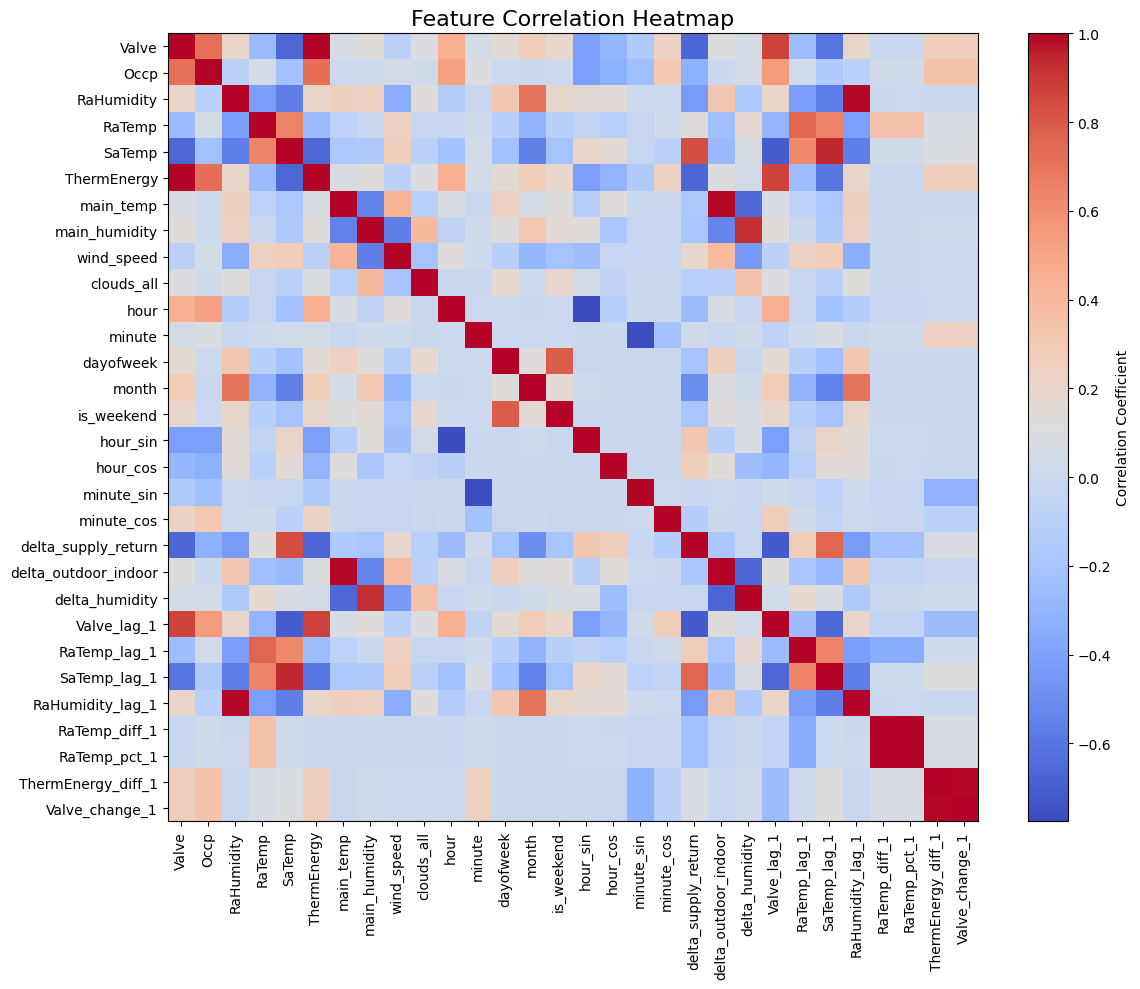

In [52]:
# Compute correlation matrix for numeric features
corr_matrix = df_model.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

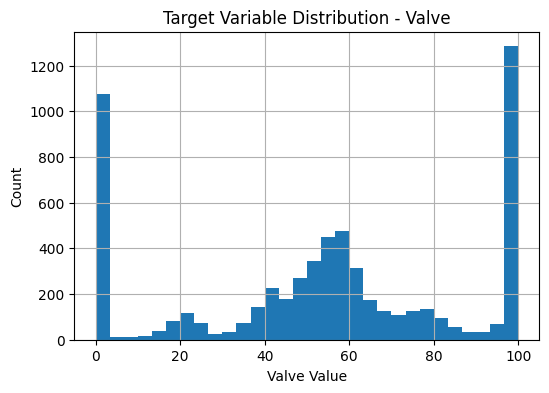

In [53]:
# 2. TARGET DISTRIBUTION CHECK
plt.figure(figsize=(6,4))
df_model['Valve'].hist(bins=30)
plt.title("Target Variable Distribution - Valve")
plt.xlabel("Valve Value")
plt.ylabel("Count")
plt.show()

In [54]:
df_model.head()

,ts,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy,main_temp,main_humidity,wind_speed,clouds_all,hour,minute,dayofweek,month,is_weekend,hour_sin,hour_cos,minute_sin,minute_cos,delta_supply_return,delta_outdoor_indoor,delta_humidity,Valve_lag_1,RaTemp_lag_1,SaTemp_lag_1,RaHumidity_lag_1,RaTemp_diff_1,RaTemp_pct_1,ThermEnergy_diff_1,Valve_change_1
0,2024-07-07 00:05:00,100.0,1,75.51844,19.300001,15.900001,12.118668,33.9,53.44,4.9,18.0,0,5,6,7,1,0.0,1.0,0.500000,8.660254e-01,-3.4,14.599999,-22.07844,100.0,18.500000,16.000000,75.34340,0.800001,0.043243,0.003010,0.0
1,2024-07-07 00:10:00,0.0,0,75.36840,18.500000,15.100000,0.000000,33.9,53.44,4.9,18.0,0,10,6,7,1,0.0,1.0,0.866025,5.000000e-01,-3.4,15.400000,-21.92840,100.0,19.300001,15.900001,75.51844,-0.800001,-0.041451,-12.118668,-100.0
2,2024-07-07 00:15:00,0.0,0,78.45040,18.600000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,15,6,7,1,0.0,1.0,1.000000,2.832769e-16,-1.6,15.300000,-25.01040,0.0,18.500000,15.100000,75.36840,0.100000,0.005405,0.000000,0.0
3,2024-07-07 00:20:00,0.0,0,76.46242,19.000000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,20,6,7,1,0.0,1.0,0.866025,-5.000000e-01,-2.0,14.900000,-23.02242,0.0,18.600000,17.000000,78.45040,0.400000,0.021505,0.000000,0.0
4,2024-07-07 00:25:00,0.0,0,76.46242,19.600000,17.700000,0.000000,33.9,53.44,4.9,18.0,0,25,6,7,1,0.0,1.0,0.500000,-8.660254e-01,-1.9,14.300000,-23.02242,0.0,19.000000,17.000000,76.46242,0.600000,0.031579,0.000000,0.0


## Checking data is stationary or non stationary 

In [55]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name=""):
    """Perform ADF test and print results."""
    r = adfuller(series.dropna(), autolag='AIC')
    output = {
        'Test Statistic': r[0],
        'p-value': r[1],
        '# Lags Used': r[2],
        '# Observations': r[3]
    }
    print(f'\nADF Test for {name}')
    for key, val in output.items():
        print(f'{key} : {val}')
    for key, val in r[4].items():
        print(f'Critical Value {key} : {val}')
        
    if r[1] <= signif:
        print(f"✅ {name} is stationary (reject H0)")
    else:
        print(f"⚠️ {name} is NON-stationary (fail to reject H0)")

# Check stationarity for target & key features
check_stationarity(df_fe['Valve'], name='Valve')
check_stationarity(df_fe['RaTemp'], name='RaTemp')
check_stationarity(df_fe['SaTemp'], name='SaTemp')
check_stationarity(df_fe['RaHumidity'], name='RaHumidity')


ADF Test for Valve
Test Statistic : -6.26167352332016
p-value : 4.2085371647988614e-08
# Lags Used : 33
# Observations : 6168
Critical Value 1% : -3.4314106393569292
Critical Value 5% : -2.862008707441413
Critical Value 10% : -2.5670194901775365
✅ Valve is stationary (reject H0)

ADF Test for RaTemp
Test Statistic : -7.324788867839245
p-value : 1.168700102985719e-10
# Lags Used : 31
# Observations : 6170
Critical Value 1% : -3.431410295408432
Critical Value 5% : -2.8620085554741395
Critical Value 10% : -2.567019409281592
✅ RaTemp is stationary (reject H0)

ADF Test for SaTemp
Test Statistic : -4.085645293332253
p-value : 0.001022813382893638
# Lags Used : 30
# Observations : 6171
Critical Value 1% : -3.4314101235178227
Critical Value 5% : -2.862008479527451
Critical Value 10% : -2.5670193688532894
✅ SaTemp is stationary (reject H0)

ADF Test for RaHumidity
Test Statistic : -3.0625311034682166
p-value : 0.029453206284958074
# Lags Used : 27
# Observations : 6174
Critical Value 1% : -3.

In [56]:
df_model.head()

,ts,Valve,Occp,RaHumidity,RaTemp,SaTemp,ThermEnergy,main_temp,main_humidity,wind_speed,clouds_all,hour,minute,dayofweek,month,is_weekend,hour_sin,hour_cos,minute_sin,minute_cos,delta_supply_return,delta_outdoor_indoor,delta_humidity,Valve_lag_1,RaTemp_lag_1,SaTemp_lag_1,RaHumidity_lag_1,RaTemp_diff_1,RaTemp_pct_1,ThermEnergy_diff_1,Valve_change_1
0,2024-07-07 00:05:00,100.0,1,75.51844,19.300001,15.900001,12.118668,33.9,53.44,4.9,18.0,0,5,6,7,1,0.0,1.0,0.500000,8.660254e-01,-3.4,14.599999,-22.07844,100.0,18.500000,16.000000,75.34340,0.800001,0.043243,0.003010,0.0
1,2024-07-07 00:10:00,0.0,0,75.36840,18.500000,15.100000,0.000000,33.9,53.44,4.9,18.0,0,10,6,7,1,0.0,1.0,0.866025,5.000000e-01,-3.4,15.400000,-21.92840,100.0,19.300001,15.900001,75.51844,-0.800001,-0.041451,-12.118668,-100.0
2,2024-07-07 00:15:00,0.0,0,78.45040,18.600000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,15,6,7,1,0.0,1.0,1.000000,2.832769e-16,-1.6,15.300000,-25.01040,0.0,18.500000,15.100000,75.36840,0.100000,0.005405,0.000000,0.0
3,2024-07-07 00:20:00,0.0,0,76.46242,19.000000,17.000000,0.000000,33.9,53.44,4.9,18.0,0,20,6,7,1,0.0,1.0,0.866025,-5.000000e-01,-2.0,14.900000,-23.02242,0.0,18.600000,17.000000,78.45040,0.400000,0.021505,0.000000,0.0
4,2024-07-07 00:25:00,0.0,0,76.46242,19.600000,17.700000,0.000000,33.9,53.44,4.9,18.0,0,25,6,7,1,0.0,1.0,0.500000,-8.660254e-01,-1.9,14.300000,-23.02242,0.0,19.000000,17.000000,76.46242,0.600000,0.031579,0.000000,0.0


In [57]:
#storing final dataframe 
df_model.to_csv("./files/final_feature_df.csv", index=False)

## END 